<a href="https://colab.research.google.com/github/nathsmo/Elements-of-ML/blob/master/Tarea2_EoML_UFM_Nathalia_Morales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemas Conceptuales

## Problema 1

Suponga que tenemos datos con cinco predictores: $X_1=\text{GPA}$ (promedio de calificaciones), $X_2=\text{IQ}$, $X_3=\text{Genero}$ (1 para Mujeres y 0 para Hombres), $X_4=\text{Interaccion entre GPA y IQ}$ y $X_5=\text{Interaccion entre GPA y Genero}$.

La respuesta es el salario inicial luego de graduarse después de graduarse (en miles de dólares). Suponga que utilizamos el ajuste de mínimos cuadrados para ajustar al modelo, obteniendo así $\hat\beta_0=50$, $\hat\beta_1=20$, $\hat\beta_2=0.07$, $\hat\beta_3=35$, $\hat\beta_4=0.01$ y $\hat\beta_5=-10$.

1. ¿Cuál de las siguientes afirmaciones es correcta? ¿Por qué?
    1. Para un valor fijo de IQ y GPA, los hombres ganan más en promedio que las mujeres.
    2. Para un valor fijo de IQ y GPA, las mujeres ganan más en promedio que los hombres.
    3. **Para un valor fijo de IQ y GPA, los hombres ganan más en promedio que las mujeres, siempre que el GPA sea lo suficientemente alto.**
    4. Para un valor fijo de IQ y GPA, las mujeres ganan más en promedio que los hombres, siempre que el GPA sea lo suficientemente alto.
    
    
    
    * Esto ocurre porque el coeficiente de mujeres es 1 y el de hombres es 0 por lo que significa que cualquier valor que acompañe esta variable sera multiplicado por la cantidad de X3 lo que indica que siempre sera multiplicado por 0 en el caso de los hombres. Esto es bueno para las mujeres mientras el GPA sea bajo pues al el GPA ser muy alto se contraresta la forma de la grafica porque el GPA se multiplicara contra B5 que es -10 por lo que el coeficiente de 0 les da ventaja en que se contraresta la interracción entre GPA y Genero para aumentar.

2. Prediga el salario de una mujer con $\text{IQ}=110$ y $\text{GPA}=4.0$.

  *  50 + (20 * 4) + (0.07 * 110) + (35 * 1) + (0.01 * 440) + (-10 * 4)
  * 137.1

3. Verdadero o Falso: Ya que el coeficiente de la interacción entre GPA y IQ es muy pequeño, no hay suficiente evidencia de que haya un término de interacción. Justifique su respuesta.

  * Falso, aún siendo el coeficiente de interacción entre el GPA e IQ  bajo no demuestra evidencia o falta de evidencia de un término de interacción. Para poder encontrar tal término de interacción se necesitaría hacer un análisis más profundo de investigación por lo cual se necesitaría un a variable p que no se nos provee en en los datos. Es cierto que el coeficiente de interacción es bajo pero eso sólo nos demuestra la baja inclinación de la pendiente en la gráfica conforme a esta variable.

## Problema 2

Para un modelo de regresión lineal simple, tenemos los coeficientes que minimizan al RSS:

$$\hat \beta_1 =\frac{\sum_{i=1}^{n}(x_i-\bar x)(y_i - \bar y)}{\sum_{i=1}^{n}(x_i-\bar x)^2}$$

$$\hat \beta_0 =\bar y - \hat \beta_1 \bar x$$

Muestre que dicha recta *siempre* pasa por el punto $(\bar x, \bar y)$.


Muestra:

https://drive.google.com/file/d/1I3BsUl5lxQsGllQUtlmVfG5viqdKi8va/view?usp=sharing

# Problema Aplicado

Exploraremos los datos que podemos encontrar en `scikit-learn`. Empezamos cargando los paquetes necesarios (realizaremos ésto solamente en esta tarea; de aquí en adelante depende de usted de cargar los paquetes necesarios, así como documentar los utilizados):

In [0]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import patsy
from patsy import dmatrix

import sklearn
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

print("Todos los paquetes han sido importados:")
print("Numpy version: {}".format(np.__version__))
print("Pandas version: {}".format(pd.__version__))
print("Matplotlib version: {}".format(matplotlib.__version__))
print("Seaborn version: {}".format(sns.__version__))
print("patsy version: {}".format(patsy.__version__))
print("Scikit-learn version: {}".format(sklearn.__version__))

Todos los paquetes han sido importados:
Numpy version: 1.14.6
Pandas version: 0.22.0
Matplotlib version: 3.0.2
Seaborn version: 0.7.1
patsy version: 0.5.1
Scikit-learn version: 0.20.2


## Modificando los parámetros de seaborn

Ésta parte es opcional, depende de su gusto para presentar gráficos. Para ver qué opciones tienen, [vean la documentación en seaborn](https://seaborn.pydata.org/tutorial/aesthetics.html).

In [0]:
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set(rc={"figure.figsize": (20, 20)})

## Un poco de EDA

`scikit-learn` tiene algunos datos que podemos acceder fácilmente. En éste caso, veremos los datos del precio de casas de Boston, pero si desea explorar algún otro, véa qué otros datos tiene disponible [`sklearn.datasets`](https://scikit-learn.org/stable/datasets/index.html#toy-datasets).

In [0]:
boston = load_boston()

# Para ver qué traen los datos, vemos los keys:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Por lo tanto, podemos acceder a los datos o predictores (`X`) mediante `boston.data` y a la variable de respuesta (`Y`) mediante `boston.target`. Asimismo, si deseamos ver la descripción de los datos, la cantidad de datos, etc., lo accedemos mediante `boston.DESCR` o bien `boston["DESCR"]`: 

In [0]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Vemos que queremos predecir el valor mediano de una casa en Boston. Convertimos a los datos en un DataFrame, aunque no es necesario. En efecto, podemos hacer:

```python
X = boston.data
Y = boston.target
```
lo cual bastaría. Sin embargo, procedemos de la forma más presentable, formando el DataFrame que usaremos:

In [0]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos["MEDV"] = boston.target

bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Matriz de Correlación

La forma más sencilla de conseguir a la matriz de correlación es mediante [`.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html):

In [0]:
print(bos.corr())

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

No se mira muy bonito, así que otra forma de visualizar la correlación entre las variables es mediante un [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html):

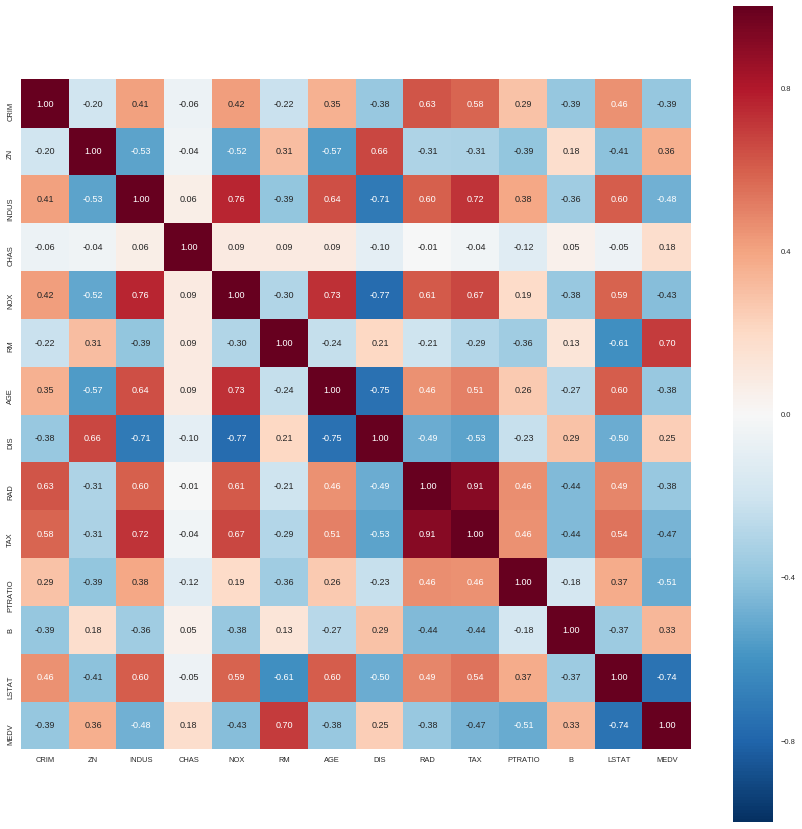

In [0]:
cols = list(bos)
sns.set(font_scale=.75)

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(bos.corr(), ax=ax, cbar=True, annot=True, fmt=".2f", square=True, yticklabels=cols, xticklabels=cols)
plt.show()

## Separando los datos en train y test

Proseguimos separando los datos en $\mathcal{T}_{\text{Tr}}$ y en $\mathcal{T}_{\text{Te}}$. Ésta vez tendremos que 

$$ |\mathcal{T}_{\text{Tr}}|/ |\mathcal{T}|=0.75 \qquad \text{ y }  \qquad |\mathcal{T}_{\text{Te}}|/| \mathcal{T}|=0.25 $$

Aunque no es una regla escrita en piedra. Además, tendremos `random_state=42` para que así se puedan reproducir los resultados de manera consistente. Usaremos, entonces a [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de `scikit-learn`, el cual nos regresará 4 conjuntos de datos: a `X` separado en el conjunto de entrenamiento y prueba, y a `Y` separado en el conjunto de entrenamiento y de prueba, respectivamente:

In [0]:
X = bos.drop("MEDV", axis=1)
Y = bos["MEDV"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)


(379, 13)
(379,)
(127, 13)
(127,)


#### Pregunta 1:

¿Existe evidencia de que alguno de sus datos tenga alto apalancamiento?

* Existe evidencia de un poco de apalancamiento en la data, por ejemplo con DIS y NDX, sin embargo no existe una muestra evidente de que una variable tenga un alto apalancamiento dentro de la data.

## Regresión Lineal

Proseguimos utilizando ahora a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) de `scikit-learn`. Primero lo llamamos, luego lo entrenamos con los datos `X_train` usando `.fit()` y finalmente realizamos predicciones tanto en nuestros datos de entrenamiento como en los datos de prueba `X_test` y calculamos su error cuadrático medio:

In [0]:
lm = LinearRegression()

lm.fit(X_train, Y_train)

# Realizamos predicciones:

pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

# Definimos a 

mse_train = mean_squared_error(Y_train, pred_train)
mse_test = mean_squared_error(Y_test, pred_test)

print("Error cuadrático medio de entrenamiento: ", mse_train)
print("Error cuadrático medio de prueba: ", mse_test)

Error cuadrático medio de entrenamiento:  22.34005799215287
Error cuadrático medio de prueba:  22.098694827098146


Si queremos acceder a los coeficientes del modelo, utilizamos a `.intercept_` para $\hat \beta_0$ y a `.coef_` para todos los otros $\hat \beta_j$:

In [0]:
print("beta_0={}".format(lm.intercept_))

print("Numero de predictores (sin intercepto):", len(lm.coef_))

print("beta_j: ",lm.coef_)

beta_0=29.83642016383877
Numero de predictores (sin intercepto): 13
beta_j:  [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]


Podemos agruparlos en un solo dataframe para presentarlos de una mejor manera:

In [0]:
coeff = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=["Feature", "CoeficienteEstimado"])

inter = [{"Feature": "INTERCEPT", "CoeficienteEstimado": lm.intercept_}]

coeff = pd.concat([pd.DataFrame(inter), coeff], ignore_index=True)

print(coeff)
#print(coeff["CoeficienteEstimado"])

    CoeficienteEstimado    Feature
0             29.836420  INTERCEPT
1             -0.128323       CRIM
2              0.029552         ZN
3              0.048859      INDUS
4              2.773503       CHAS
5            -16.238829        NOX
6              4.368755         RM
7             -0.009248        AGE
8             -1.400867        DIS
9              0.257761        RAD
10            -0.009957        TAX
11            -0.923123    PTRATIO
12             0.013185          B
13            -0.517640      LSTAT


### Ejercicio 2: 

Obtenga los parametros obtenidos arriba usando NumPy, patsy, etc., como un `array`. Compararemos sus parámetros con `coeff` arriba y no debe de tirar error el programa. Defina a una función que luego llamará mediante el bloque

```python
beta = # Su función aquí
```

In [0]:
import statsmodels.formula.api as smf
from astropy.table import Table, Column
import statsmodels.api as sm
from sklearn import datasets

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

est = smf.ols(formula="MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT", data=bos).fit()
print(est.summary().tables[1])


est2 = smf.ols(formula="MEDV ~ CRIM", data=bos).fit()
#print(est2.summary().tables[1])

tabl1 = (est.summary().tables[1])
t = Table(tabl1[1:])
t1=(t[1])
#print(t1)
beta = []
for i in t1:
  beta.append(i)
  #print(i)


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.0

In [0]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.0

In [0]:
#assert np.linalg.norm(coeff["CoeficienteEstimado"]-beta, ord=2) < 10**(-5), "¡Oh no, sus coeficientes son muy distintos! Revise su algoritmo."

Lamentablemente no logré encontrar una función que encontrara los mismos parametros que fueron encontrados en la otra función, tienen una diferencia considerable entre lo que yo encontré y lo que nos fue dado.


## Regresion polinomial de grado 2

Puede que la regresión lineal no sea suficiente. Para ésto, podemos utilizar a [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) y a [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html). Primero convertimos a nuestras variables al grado que queremos y luego realizamos una regresión lineal:

In [0]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

Proseguimos de la misma manera que antes: ajustamos al modelo utilizando a los datos de entrenamiento y luego realizamos predicciones

In [0]:
p = poly_model.fit(X_train, Y_train)

poly_pred_train = poly_model.predict(X_train)
poly_pred_test = poly_model.predict(X_test)

poly_mse_train = mean_squared_error(Y_train, poly_pred_train)
poly_mse_test = mean_squared_error(Y_test, poly_pred_test)

print("Error cuadrático medio de entrenamiento: ", poly_mse_train)
print("Error cuadrático medio de prueba: ", poly_mse_test)

Error cuadrático medio de entrenamiento:  34.29288161897933
Error cuadrático medio de prueba:  97.50243738873462


### Ejercicio 3:

Grafique MSE_train y MSE_test para distintos grados de polinomio $d$, con $0\leq d \leq 5$. Concluya.

*Ayuda: Defina una función que haga de manera automática nuestro procedimiento anterior. Luego grafique a los MSE de entrenamiento y prueba y vea cuál grado de polinomio minimiza el de prueba. Puede usar, de envés de MSE, al logaritmo de éste mediante `np.log` para poder visualizar fácilmente a alos errores de prueba.*

[88.68173153904524, 22.340057992152875, 34.29288161897933, 3.0556456927248895e-16, 1.946475942800011e-18, 4.517420920897945e-19]
[72.2607627995582, 22.098694827097894, 97.50243738873462, 215056.98477470674, 615640.5124511658, 318883.1601605086]


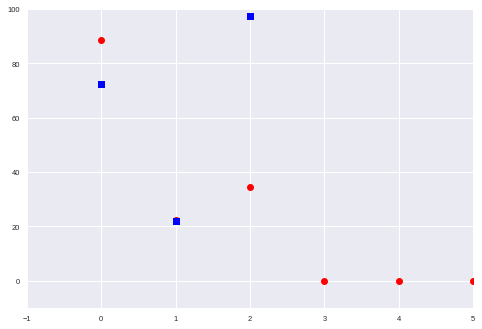

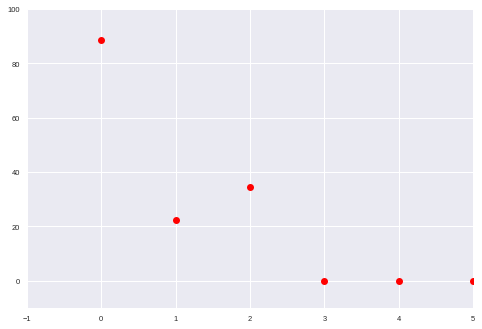

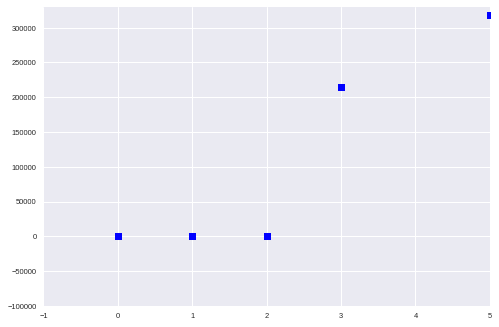

In [0]:
iterations = []
listat = []
listaT = []
def grafica():
  for i in range(6):
    iterations.append(i)

    poly_model = make_pipeline(PolynomialFeatures(degree=i), LinearRegression())
    
    p = poly_model.fit(X_train, Y_train)
    
    poly_pred_train = poly_model.predict(X_train)
    poly_pred_test = poly_model.predict(X_test)
    
    poly_mse_train = mean_squared_error(Y_train, poly_pred_train)
    poly_mse_test = mean_squared_error(Y_test, poly_pred_test)
    
    listat.append(poly_mse_train)
    listaT.append(poly_mse_test)
    
grafica()


print(listat)
print(listaT)

import matplotlib.pyplot as plt
plt.plot(iterations, listat, 'ro')
plt.plot(iterations, listaT, 'bs')
plt.axis([-1, 5, -10, 100])
plt.show()

plt.plot(iterations, listat, 'ro')
plt.axis([-1, 5, -10, 100])
plt.show()

plt.plot(iterations, listaT, 'bs')
plt.axis([-1, 5, -100000, 330000])
plt.show()
    

No se logran ver los ultimos 3 datos en la Test data, por eso he agregado las tres graficas.
Y en la iteracion 2 amba data tanto de train como de test tienen un error de 20 por eso solo se mira un punto.